# Final Project - IBM Data science Coursera course

## I. Introduction/Business Problem

In an effort to reduce the frequency of car collisions on the busy roads, the Seattle adminstration is going to prevent avoidable car accidents by employing methods that alert drivers, health system, and police to remind them to be more careful in critical situations like bad weather. An algorithim must be developed to predict the severity of an accident given the current weather, road and visibility conditions. When conditions are bad, this model will alert drivers to remind them to be more careful. In most cases, not paying enough attention during driving, abusing drugs and alcohol or driving at very high speed are the main causes of occurring accidents that can be prevented by enacting harsher regulations. Besides the aforementioned reasons, weather, visibility, or road conditions are the major uncontrollable factors that can be prevented by revealing hidden patterns in the data and announcing warning to the local government, police and drivers on the targeted roads. The target audience of the project is local Seattle government, police, rescue groups, and last but not least, car insurance institutes. The model and its results are going to provide some advice for the target audience to make insightful decisions for reducing the number of accidents and injuries for the city drivers

## II. Data section

The data was collected by the Seattle Police Department and Accident Traffic Records Department from 2004 to present.

The data consists of 37 independent variables and 194,673 rows. The dependent variable, “SEVERITYCODE”, contains numbers that correspond to different levels of severity caused by an accident from 1 to 2

The data used for this study is given by the Applied Data Science Capstone course on Coursera.org via the following link https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

Python packages will be used to conduct this study. The dataset will be cleaned according to the requirements of this project. Missing data information will either be substituted using valid means or dropped – considering the amount of missing data and the description of individual elements

In [52]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
# Read the downloaded Data-Collisions csv and assign it to variable "df"
folder_path = "https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv"
df = pd.read_csv(folder_path)

In [55]:
print('The dataset has {:3,d} samples and {} features'.format(*df.shape))

The dataset has 194,673 samples and 38 features


In [56]:
# show the first 5 rows using dataframe.head() method
print("The first 5 rows of the dataframe") 
df.head(5)

The first 5 rows of the dataframe


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [57]:
# check the data type of data frame "df" by .dtypes
print(df.dtypes)

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [58]:
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [59]:
# describe all the columns in "df" 
df.describe(include = "all")

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,194673,194673,192747,65070.000000,...,189661,189503,4667,1.149360e+05,9333,194655,189769,194673.000000,1.946730e+05,194673
unique,NaN,NaN,NaN,NaN,NaN,NaN,194670,2,3,NaN,...,9,9,1,NaN,1,115,62,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,1780512,Matched,Block,NaN,...,Dry,Daylight,Y,NaN,Y,32,One parked--one moving,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,NaN,2,189786,126926,NaN,...,124510,116137,4667,NaN,9333,27612,44421,NaN,NaN,187457
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,NaN,NaN,NaN,37558.450576,...,NaN,NaN,NaN,7.972521e+06,NaN,NaN,NaN,269.401114,9.782452e+03,NaN
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,NaN,NaN,NaN,51745.990273,...,NaN,NaN,NaN,2.553533e+06,NaN,NaN,NaN,3315.776055,7.226926e+04,NaN
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,NaN,NaN,NaN,23807.000000,...,NaN,NaN,NaN,1.007024e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,NaN,NaN,NaN,28667.000000,...,NaN,NaN,NaN,6.040015e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,NaN,NaN,NaN,29973.000000,...,NaN,NaN,NaN,8.023022e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,NaN,NaN,NaN,33973.000000,...,NaN,NaN,NaN,1.015501e+07,NaN,NaN,NaN,0.000000,0.000000e+00,NaN


In [60]:
# look at the info of "df"
df.info

<bound method DataFrame.info of         SEVERITYCODE           X          Y  OBJECTID  INCKEY  COLDETKEY  \
0                  2 -122.323148  47.703140         1    1307       1307   
1                  1 -122.347294  47.647172         2   52200      52200   
2                  1 -122.334540  47.607871         3   26700      26700   
3                  1 -122.334803  47.604803         4    1144       1144   
4                  2 -122.306426  47.545739         5   17700      17700   
5                  1 -122.387598  47.690575         6  320840     322340   
6                  1 -122.338485  47.618534         7   83300      83300   
7                  2 -122.320780  47.614076         9  330897     332397   
8                  1 -122.335930  47.611904        10   63400      63400   
9                  2 -122.384700  47.528475        12   58600      58600   
10                 1         NaN        NaN        14   48900      48900   
11                 1 -122.333831  47.547371        15   

## III. Methodology


For implementing the solution, I have used Github as a repository and running Jupyter Notebook to preprocess data and build Machine Learning models. 
Regarding coding, I have used Python and its popular packages such as Pandas, NumPy and Sklearn.

Once I have load data into Pandas Dataframe, used ‘dtypes’ attribute to check the feature names and their data types. Then I have selected the most important features to predict the severity of accidents in Seattle. Among all the features, the following features have the most influence in the accuracy of the predictions:
**“WEATHER”,
“ROADCOND”,
“LIGHTCOND”**

Also, as I mentioned earlier, “SEVERITYCODE” is the target variable.
I have run a value count on road (‘ROADCOND’) and weather condition (‘WEATHER’) to get ideas of the different road and weather conditions. 
I also have run a value count on light condition (’LIGHTCOND’), to see the breakdowns of accidents occurring during the different light conditions. 
The results can be seen below:

In [61]:
df['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [62]:
df['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [63]:
df['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [64]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [65]:
df['SEVERITYCODE'].unique()

array([2, 1])

In [66]:
df['SEVERITYDESC'].unique()

array(['Injury Collision', 'Property Damage Only Collision'], dtype=object)

In [67]:
df.shape

(194673, 38)

In [68]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

## III. Methodology contd...


After balancing SEVERITYCODE feature, and standardizing the input feature, the data has been ready for building machine learning models.
I have employed 1 machine learning models:
Decision Tree


After importing necessary packages and splitting preprocessed data into test and train sets, for each machine learning model, I have built and evaluated the model and shown the results as follow:

## Data Wrangling

We are only interested in SEVERITYCODE, ADDRTYPE, JUNCTIONTYPE, SDOT_COLDESC, WEATHER, LIGHTCOND

**SEVERITYCODE:**

1 = Property Damage Only Collision

2 = Injury Collision

In [69]:
# We drop all columns expect the listed above
df.drop(df.columns.difference(['SEVERITYDESC', 'ADDRTYPE', 'JUNCTIONTYPE', 'SDOT_COLDESC', 'WEATHER', 'LIGHTCOND'])\
, axis=1, inplace=True)
df.head()

,ADDRTYPE,SEVERITYDESC,JUNCTIONTYPE,SDOT_COLDESC,WEATHER,LIGHTCOND
0,Intersection,Injury Collision,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Overcast,Daylight
1,Block,Property Damage Only Collision,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",Raining,Dark - Street Lights On
2,Block,Property Damage Only Collision,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Overcast,Daylight
3,Block,Property Damage Only Collision,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Daylight
4,Intersection,Injury Collision,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Raining,Daylight


In [70]:
#show in a df format null value in boolean results
null_values=df.isnull()
null_values

,ADDRTYPE,SEVERITYDESC,JUNCTIONTYPE,SDOT_COLDESC,WEATHER,LIGHTCOND
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [71]:
# Check null elements
for column in null_values.columns.values.tolist():
    print(column)
    print(null_values[column].value_counts().sort_values(ascending=True))
    print("")

ADDRTYPE
True       1926
False    192747
Name: ADDRTYPE, dtype: int64

SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64

JUNCTIONTYPE
True       6329
False    188344
Name: JUNCTIONTYPE, dtype: int64

SDOT_COLDESC
False    194673
Name: SDOT_COLDESC, dtype: int64

WEATHER
True       5081
False    189592
Name: WEATHER, dtype: int64

LIGHTCOND
True       5170
False    189503
Name: LIGHTCOND, dtype: int64



**We see we have some null values, so we can either replace these elements with the most frequent or drop these rows. We will check the percentage of rows wil nans**

In [72]:
#gives statistics for categorical variables
df.describe(include='O')

,ADDRTYPE,SEVERITYDESC,JUNCTIONTYPE,SDOT_COLDESC,WEATHER,LIGHTCOND
count,192747,194673,188344,194673,189592,189503
unique,3,2,7,39,11,9
top,Block,Property Damage Only Collision,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Daylight
freq,126926,136485,89800,85209,111135,116137


In [73]:
df_with_nans=df.dropna()
df_with_nans.shape

(182954, 6)

In [74]:
a=(1-(182954/194673))*100
print("%.2f" % a,"%")

6.02 %


In [75]:
# With 6.02% rows with nans, we will drop these rows
df=df.dropna()
df.shape

(182954, 6)

In [76]:
df

,ADDRTYPE,SEVERITYDESC,JUNCTIONTYPE,SDOT_COLDESC,WEATHER,LIGHTCOND
0,Intersection,Injury Collision,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Overcast,Daylight
1,Block,Property Damage Only Collision,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",Raining,Dark - Street Lights On
2,Block,Property Damage Only Collision,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Overcast,Daylight
3,Block,Property Damage Only Collision,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Daylight
4,Intersection,Injury Collision,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Raining,Daylight
5,Intersection,Property Damage Only Collision,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Daylight
6,Intersection,Property Damage Only Collision,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Raining,Daylight
7,Intersection,Injury Collision,At Intersection (intersection related),PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,Clear,Daylight
8,Block,Property Damage Only Collision,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Daylight
9,Intersection,Injury Collision,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Daylight


In [77]:
# we will resit index to correct rows numbers
df=df.reset_index(drop=True)
df

,ADDRTYPE,SEVERITYDESC,JUNCTIONTYPE,SDOT_COLDESC,WEATHER,LIGHTCOND
0,Intersection,Injury Collision,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Overcast,Daylight
1,Block,Property Damage Only Collision,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",Raining,Dark - Street Lights On
2,Block,Property Damage Only Collision,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Overcast,Daylight
3,Block,Property Damage Only Collision,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Daylight
4,Intersection,Injury Collision,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Raining,Daylight
5,Intersection,Property Damage Only Collision,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Daylight
6,Intersection,Property Damage Only Collision,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Raining,Daylight
7,Intersection,Injury Collision,At Intersection (intersection related),PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,Clear,Daylight
8,Block,Property Damage Only Collision,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Daylight
9,Intersection,Injury Collision,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Daylight


In [78]:
#Also check to confirm no more null values
df.isnull().sum()

ADDRTYPE        0
SEVERITYDESC    0
JUNCTIONTYPE    0
SDOT_COLDESC    0
WEATHER         0
LIGHTCOND       0
dtype: int64

In [79]:
#Check groups of features
print("ADDRTYPE: \n", df['ADDRTYPE'].value_counts() )
print("LIGHTCOND: \n",df['LIGHTCOND'].value_counts())

print("\n WEATHER: \n",df['WEATHER'].value_counts())
print("\n JUNCTIONTYPE: \n",df['JUNCTIONTYPE'].value_counts())
print("\n SDOT_COLDESC: \n",df['SDOT_COLDESC'].value_counts())

ADDRTYPE: 
 Block           119393
Intersection     63326
Alley              235
Name: ADDRTYPE, dtype: int64
LIGHTCOND: 
 Daylight                    113868
Dark - Street Lights On      47563
Unknown                      10453
Dusk                          5775
Dawn                          2454
Dark - No Street Lights       1462
Dark - Street Lights Off      1158
Other                          210
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

 WEATHER: 
 Clear                       109084
Raining                      32653
Overcast                     27200
Unknown                      11642
Snowing                        881
Other                          747
Fog/Smog/Smoke                 556
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               49
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

 JUNCTIONTYPE: 
 Mid-Block (not related to intersection)              86635
At Intersection (intersection

## Data Visualisation and Exploratory

(-1000, 80000)

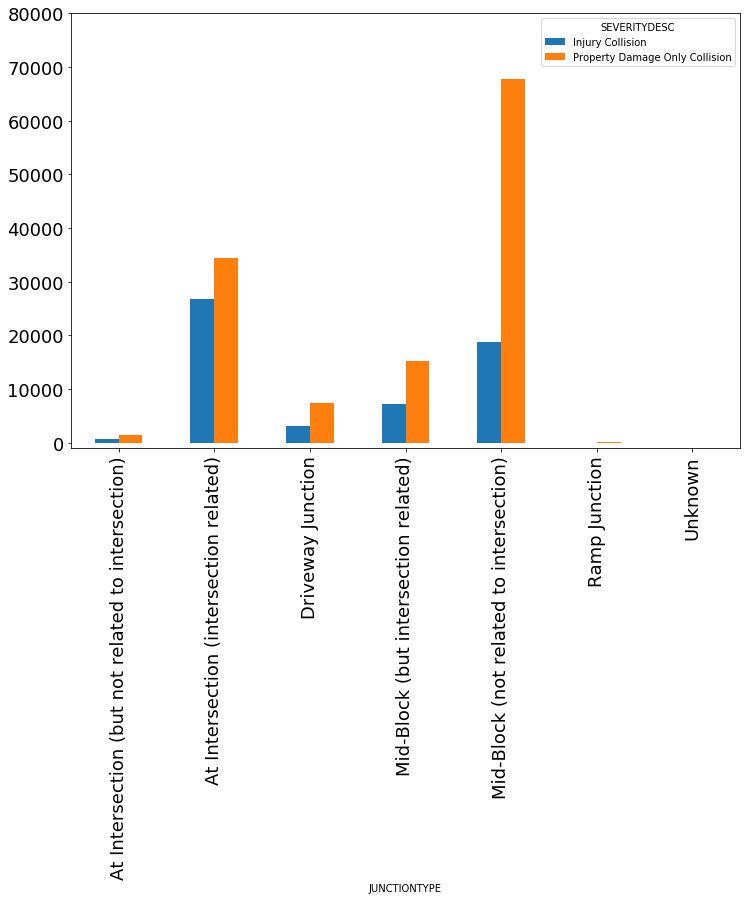

In [80]:
df.groupby(['JUNCTIONTYPE', 'SEVERITYDESC']).agg('size').unstack().plot(kind = 'bar', legend=True, figsize=(12, 8), fontsize=18)
plt.ylim((-1000,80000))

(-1000, 100000)

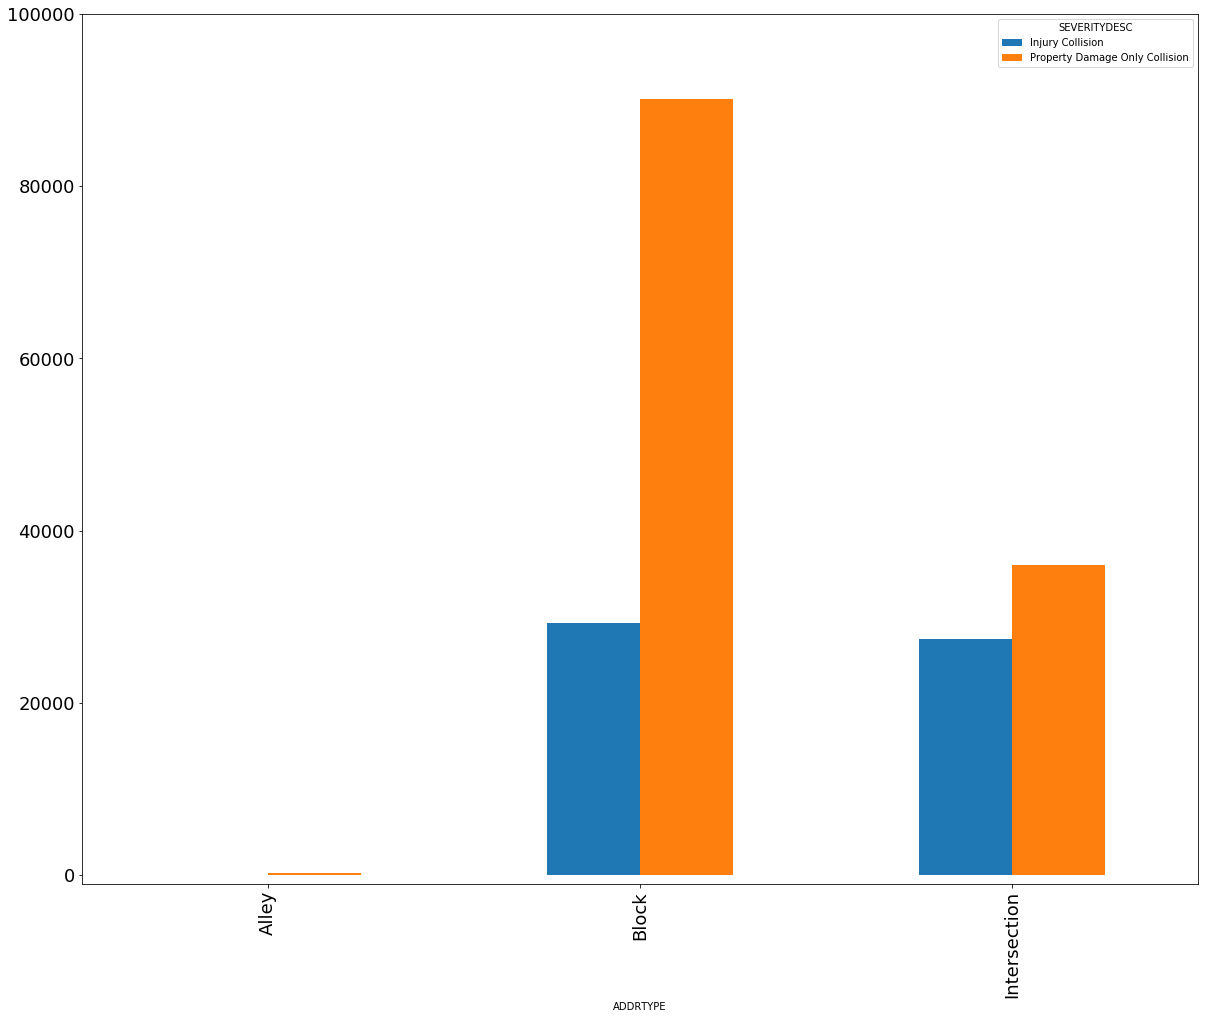

In [81]:
df.groupby(['ADDRTYPE', 'SEVERITYDESC']).agg('size').unstack().plot(kind = 'bar', figsize=(20,16), legend=True, fontsize=18)
plt.ylim((-1000, 100000))

## One Hot Encoding

**One Hot Encoding -- Looking at the elements I am going to use One Hot Encoding to turn these categorical variables to numerical variables but before we will check data type and convert them**

In [82]:
df.dtypes

ADDRTYPE        object
SEVERITYDESC    object
JUNCTIONTYPE    object
SDOT_COLDESC    object
WEATHER         object
LIGHTCOND       object
dtype: object

In [83]:
df

,ADDRTYPE,SEVERITYDESC,JUNCTIONTYPE,SDOT_COLDESC,WEATHER,LIGHTCOND
0,Intersection,Injury Collision,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Overcast,Daylight
1,Block,Property Damage Only Collision,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",Raining,Dark - Street Lights On
2,Block,Property Damage Only Collision,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Overcast,Daylight
3,Block,Property Damage Only Collision,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Daylight
4,Intersection,Injury Collision,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Raining,Daylight
5,Intersection,Property Damage Only Collision,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Daylight
6,Intersection,Property Damage Only Collision,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Raining,Daylight
7,Intersection,Injury Collision,At Intersection (intersection related),PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,Clear,Daylight
8,Block,Property Damage Only Collision,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Daylight
9,Intersection,Injury Collision,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Daylight


In [84]:
Feature=df['SEVERITYDESC']
Feature=pd.concat([Feature, pd.get_dummies(df[['ADDRTYPE','JUNCTIONTYPE','SDOT_COLDESC','WEATHER','LIGHTCOND']])], axis=1)

Feature.head()

,SEVERITYDESC,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection,JUNCTIONTYPE_At Intersection (but not related to intersection),JUNCTIONTYPE_At Intersection (intersection related),JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Mid-Block (but intersection related),JUNCTIONTYPE_Mid-Block (not related to intersection),JUNCTIONTYPE_Ramp Junction,...,WEATHER_Unknown,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown
0,Injury Collision,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,Property Damage Only Collision,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,Property Damage Only Collision,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,Property Damage Only Collision,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,Injury Collision,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [85]:
Feature.drop(['SEVERITYDESC'], axis=1, inplace=True)
Feature

,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection,JUNCTIONTYPE_At Intersection (but not related to intersection),JUNCTIONTYPE_At Intersection (intersection related),JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Mid-Block (but intersection related),JUNCTIONTYPE_Mid-Block (not related to intersection),JUNCTIONTYPE_Ramp Junction,JUNCTIONTYPE_Unknown,...,WEATHER_Unknown,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [86]:
X=Feature
X[0:5]

,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection,JUNCTIONTYPE_At Intersection (but not related to intersection),JUNCTIONTYPE_At Intersection (intersection related),JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Mid-Block (but intersection related),JUNCTIONTYPE_Mid-Block (not related to intersection),JUNCTIONTYPE_Ramp Junction,JUNCTIONTYPE_Unknown,...,WEATHER_Unknown,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [87]:
y=df['SEVERITYDESC'].values
y[0:5]

array(['Injury Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision', 'Property Damage Only Collision',
       'Injury Collision'], dtype=object)

In [88]:
print("Feature shape:", Feature.shape)
print("X shape:",X.shape)
print ("y shape:", y.shape)

Feature shape: (182954, 69)
X shape: (182954, 69)
y shape: (182954,)


## Model Development and Evaluation

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print('train set:', X_train.shape, y_train.shape)
print('test set:', X_test.shape, y_test.shape)

train set: (146363, 69) (146363,)
test set: (36591, 69) (36591,)


## Decision Tree Model

In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

In [91]:
#Modelling phase
Accident_Severity_Model=DecisionTreeClassifier(criterion='entropy', max_depth=5)
Accident_Severity_Model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [92]:
#Predicting phase
Predicting_Severity=Accident_Severity_Model.predict(X_test)
print(Predicting_Severity [0:5])
print(y_test [0:5])

['Property Damage Only Collision' 'Property Damage Only Collision'
 'Property Damage Only Collision' 'Property Damage Only Collision'
 'Property Damage Only Collision']
['Property Damage Only Collision' 'Injury Collision'
 'Property Damage Only Collision' 'Property Damage Only Collision'
 'Injury Collision']


In [93]:

#Accuracy of the model using sklearn
from sklearn import metrics
print("Decision Tress Accuracy:", metrics.accuracy_score(y_test, Predicting_Severity))

Decision Tress Accuracy: 0.7380503402476019


In [94]:
#for visualization of the model
import sklearn.datasets as datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
#import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

In [95]:
!pip install pydotplus

In [96]:
import pydotplus

## IV. Result 

**1. The following result is of the decision tree with depth of 5 nodes**

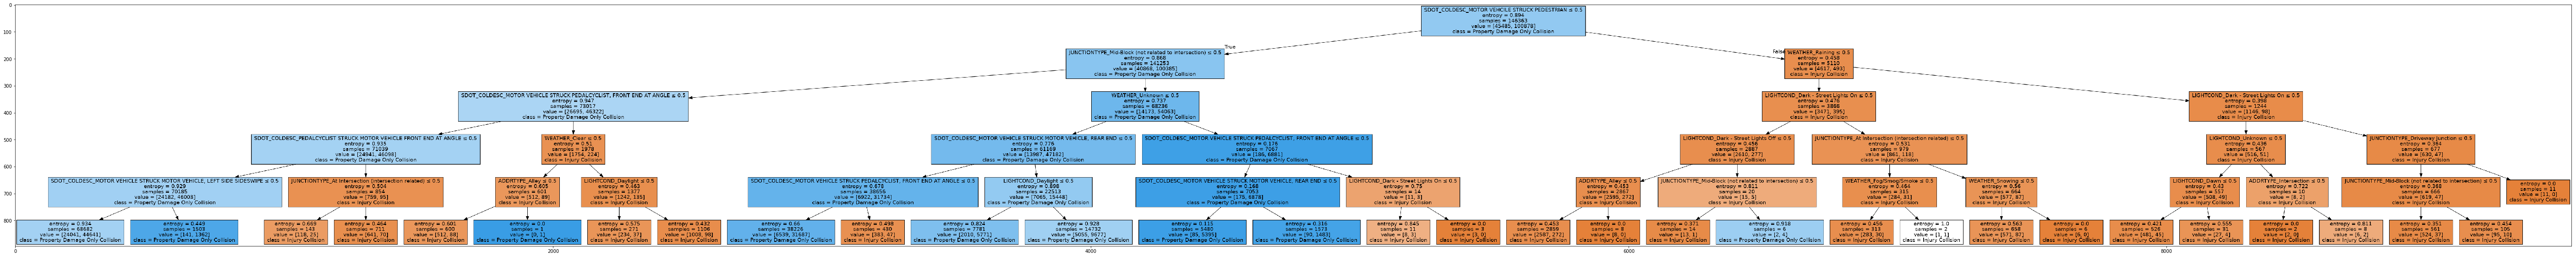

In [97]:
dot_data=StringIO()
filename="Severity_Tree.png"
featureNames=Feature.columns
out=tree.export_graphviz(Accident_Severity_Model, feature_names=featureNames, out_file=dot_data, class_names=np.unique(y_train),\
                        filled=True, special_characters=True, rotate=False)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img=mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img, interpolation='nearest')

## Evaluation

In [98]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

In [99]:
Tree_Prediction=Accident_Severity_Model.predict(X_test)
jc=jaccard_similarity_score(y_test, Tree_Prediction)
fs=f1_score(y_test, Tree_Prediction, average='weighted')

In [100]:
list_jc = [jc]
list_fs = [fs]

## IV. Result contd...

**The following are the evaluation results**

In [101]:
df = pd.DataFrame(list_jc, index=['Decision Tree'])

df.columns = ['Jaccard']
df.insert(loc=1, column='F1-score', value=list_fs)

df

,Jaccard,F1-score
Decision Tree,0.73805,0.668051


## V. Discussion and Conclusion
This project aimed to study the relationship between severity level of road traffic collisions in junction types. From our data analysis the graph shown in above figures illustrate that there are different levels of collision count in junction and address types. Such as the difference in severity level in junction types in not so much in all junction except mid-block ( which is not related to intersection ) junction type.
As for address types, at block type we can see the same thing for property damage collision only but for injury collision between Alley and Block the difference is so much different.

To conclude, this project aimed at exploring the data to provide insight in severity levels for road collisions at junctions. The predictive model would be usefult to help local authorities decide on whether to implement new safety measures in certain areas